# Projet de Classification non Supervisée
#### BIDART Julen - BUISSON Zacharie - GUILLET Thomas

## Partie 1 : Affichage des signatures

In [201]:
#Liste de tous les imports nécéssaires

import os
import matplotlib.pyplot as plt
import numpy as np
from random import uniform

In [136]:
#Code intermédiaire qui permet de partitionner les mots d'une ligne, séparés d'un caractère donné
def separe_espace(chaine,caractere):
    liste_mot=[]
    chaine_actuelle=""
    for i in chaine:
        if i == caractere:
            liste_mot+=[float(chaine_actuelle)]
            chaine_actuelle=""
        else:
            chaine_actuelle+=i
    if chaine_actuelle != "":
        liste_mot+=[chaine_actuelle]
    return liste_mot

In [128]:
separe_espace("30 2012 65596 5"," ")

[30, 2012, 65596, '5']

In [138]:
def visualise_signature_i(numero_signature):
    liste_signature=os.listdir('Untitled Folder')
    liste_entete=[]
    bon_fichier=1
    for numero_fichier in range(0,len(liste_signature)):
        entete=""
        avant_v=False
        for caractere in liste_signature[numero_fichier]:
            if avant_v==False:
                if caractere=="v":
                    avant_v=True
                else:
                    entete+=caractere
        liste_entete+=[entete]
    for indice_entetes in range(0,len(liste_entete)):
        if int(liste_entete[indice_entetes])==numero_signature:
            bon_fichier=liste_signature[indice_entetes]
    adresse_fichier="Untitled Folder/"+bon_fichier
    
    fi=open(adresse_fichier,'r')
    
    liste_x=[]
    liste_y=[]
    liste_p=[]
    liste_az=[]
    liste_al=[]
    
    line=fi.readline()
    while line:
        coordonnees_ligne=separe_espace(line," ")
        liste_x+=[coordonnees_ligne[0]]
        liste_y+=[coordonnees_ligne[1]]
        liste_p+=[coordonnees_ligne[2]]
        liste_az+=[coordonnees_ligne[3]]
        liste_al+=[coordonnees_ligne[4]]
        line=fi.readline()
    fi.close()
    #return(liste_x,liste_y)
    
    plt.plot(liste_x,liste_y,'b')
    #plt.plot(liste_y,liste_x)
    plt.show()
        
            
            

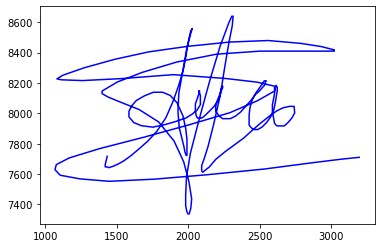

In [139]:
visualise_signature_i(54)

### Mesure de compléxité et catégorisation

In [165]:
#Code intermédiaire qui permet de partitionner les mots d'une ligne, séparés d'un caractère donné
def separe_espace2(chaine,caractere):
    liste_mot=[]
    chaine_actuelle=""
    for i in chaine:
        if i == caractere:
            liste_mot+=[chaine_actuelle]
            chaine_actuelle=""
        else:
            chaine_actuelle+=i
    if chaine_actuelle != "":
        liste_mot+=[chaine_actuelle]
    return liste_mot

In [169]:
#Question 1 : Mesure de complexité moyenne
#On suppose que l'on fait une moyenne empirique classique

def moyenne(liste):
    resu=0
    for i in liste:
        resu+=float(i.replace(',','.'))
    return resu/len(liste)

def moyenne_fichier(fichier):
    adresse_fichier="Untitled Folder/"+fichier
    fi=open(adresse_fichier, 'r')
    line=fi.readline()
    resu=[]
    while line:
        valeur_ligne=separe_espace2(line, "	")
        resu+=[moyenne(valeur_ligne)]
        line=fi.readline()
    return resu


#### Tests du code : Retirer les Mots-dièse.

In [174]:
#moyenne_fichier("Complexité avec 4G (100x25).txt")

In [175]:
#moyenne_fichier("Complexité avec 8G (100x25).txt")

In [176]:
#moyenne_fichier("Complexité avec 24G (100x25).txt")

## Partie 2 : Clustering

### Préliminaires à propos des données

Dans cette partie, on se propose d'étudier la repartition en catégories des différentes valeurs de compléxité moyenne des signatures. Pour, on nous suggère de regarder les moyennes, et d'appliquer différentes méthodes et analyses pour tirer des conclusions de cela.

Déjà, on peut noter que ces données sont en dimension 1 : on n'a qu'une seule variable par signature, qui est la moyenne de compléxité, et ceci simplifie l'analyse.

Ensuite, on peut voir que les 3 analyses se font par rapport à un certain nombre de gaussiennes, et ceci va faire fluctuer les valeurs des moyennes : l'analyse sera donc faite 3 fois, mais les exécutions se

### Méthode n°1 : Regroupement Hiérarchique Ascendant

In [196]:
#Méthodes de Regroupement Hiérarchique Ascendant

def liste_singleton(n):
    resu=[]
    for i in range(0,n):
        resu+=[[i]]
    return resu

def distance_min_ensemble(A,B):
    resu=float('inf')
    for a in A:
        for b in B:
            distance=abs(b-a)
            if resu > distance:
                resu=distance
    return resu

def regroupement_hierarchique_ascendant(liste_moyenne,nombre_de_classe):
    classes = []
    for i in liste_moyenne:
        classes += [[i]]
    while len(classes) > nombre_de_classe:
        classe_a_changer_a = []
        classe_a_changer_b = []
        n = len(classes)
        distance_min = float('inf')
        for indice_element_a in range(0,n):
            for indice_element_b in range(0,n):
                dist = distance_min_ensemble(classes[indice_element_a], classes[indice_element_b])
                if (dist < distance_min) and (classes[indice_element_a] != classes[indice_element_b]):
                    distance_min = dist
                    classe_a_changer_a = classes[indice_element_a]
                    classe_a_changer_b = classes[indice_element_b]
        nouvelle_classe = classe_a_changer_b + classe_a_changer_a
        classes.remove(classe_a_changer_a)
        classes.remove(classe_a_changer_b)
        classes += [nouvelle_classe]
        print(distance_min)
    return classes
        
                    
                

In [198]:
#regroupement_hierarchique_ascendant(moyenne_fichier("Complexité avec 4G (100x25).txt"),3)

In [199]:
#regroupement_hierarchique_ascendant(moyenne_fichier("Complexité avec 8G (100x25).txt"),3)

In [200]:
#regroupement_hierarchique_ascendant(moyenne_fichier("Complexité avec 24G (100x25).txt"),3)

Cette méthode nous donne des groupes différents, en fonction de la méthode de dissimilarité choisie. Ici, on se propose de regarder les plus proches voisins, afin de faire la classification.

Cette méthode nous donne donc 3 classes, qui sont faites avec les plus proches voisins.

Ici, on voit que l'on va être limité par la complexité dès lors que l'on aura des nombres de signatures à traiter qui seront plus élevées : les méthodes de comparaison entre élements paraissent naïves à certains moments, et créer de la compléxité. (en O(n^3))

### Méthode n°2 : K-moyennes

In [ ]:
#Méthode des K-moyennes

def minim(liste):
    resu=float('inf')
    for i in liste:
        if i<resu:
            resu=i
    return i

def maxim(liste):
    resu=float('-inf')
    for i in liste:
        if i>resu:
            resu=i
    return i

def K_moyenne(li,K):
    K_centres=(uniform(minim(li),maxim(li)),uniform(minim(li),maxim(li)),uniform(minim(li),maxim(li)))
    
    